In [ ]:
import pandas as pd

# Create a sample sales dataset
data = {
    'Date': ['2025-04-01', '2025-04-02', '2025-04-03', '2025-04-04', '2025-04-05'],
    'Product': ['Laptop', 'Phone', 'Headphones', 'Laptop', 'Phone'],
    'Category': ['Electronics', 'Electronics', 'Accessories', 'Electronics', 'Electronics'],
    'Units Sold': [10, 15, 5, 8, 12],
    'Unit Price': [1000, 800, 150, 1000, 800],
    'Discount': [50, 30, 20, 50, 30],
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Calculate Total Sales
df['Total Sales'] = df['Units Sold'] * df['Unit Price'] - df['Discount']

# Display the DataFrame
df


: 

In [ ]:
import pandas as pd

# URL of the sales dataset
# Original URL: url = 'https://raw.githubusercontent.com/datasets/sales-data/master/sales.csv'
# This dataset repository appears to have moved. Updated URL to find a similar sales dataset:
url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

,0
Order ID,59
Product,59
Quantity Ordered,59
Price Each,59
Order Date,59
Purchase Address,59


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
df = df.drop_duplicates()


Number of duplicate rows: 114


In [ ]:
import pandas as pd

# URL of the sales dataset
url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset to check column names
df.head()

# Check the column names in your DataFrame
print(df.columns)

# Assuming the date column is named 'Order Date' based on the dataset
# Convert the "Order Date" column to datetime format, handling errors
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check for rows with invalid dates (NaT values)
invalid_dates = df[df['Order Date'].isnull()]
print(invalid_dates)

# Handle the invalid dates (e.g., impute, remove, or fix them)
# ... (Your logic to handle invalid dates) ...

# Check the data types of all columns
df.dtypes

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


<ipython-input-5-779634bf46a9>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


       Order ID  Product  Quantity Ordered  Price Each Order Date  \
1           NaN      NaN               NaN         NaN        NaT   
356         NaN      NaN               NaN         NaN        NaT   
519    Order ID  Product  Quantity Ordered  Price Each        NaT   
735         NaN      NaN               NaN         NaN        NaT   
1149   Order ID  Product  Quantity Ordered  Price Each        NaT   
...         ...      ...               ...         ...        ...   
17324  Order ID  Product  Quantity Ordered  Price Each        NaT   
17339  Order ID  Product  Quantity Ordered  Price Each        NaT   
17446       NaN      NaN               NaN         NaN        NaT   
17718       NaN      NaN               NaN         NaN        NaT   
17744  Order ID  Product  Quantity Ordered  Price Each        NaT   

       Purchase Address  
1                   NaN  
356                 NaN  
519    Purchase Address  
735                 NaN  
1149   Purchase Address  
...            

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,datetime64[ns]
Purchase Address,object


In [ ]:
# Fill all missing values in the entire dataset with 0
df = df.fillna(0)

In [ ]:
# Drop rows that have any missing values
df = df.dropna()

In [ ]:
# Check for missing values after handling them
df.isnull().sum()

# Verify that duplicates have been removed
df.duplicated().sum()


np.int64(114)

In [ ]:
# Summary statistics for numerical columns
df.describe()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18383,18383,18383,18383,18383,18383
unique,17539,21,9,20,13584,17121
top,0,Lightning Charging Cable,1,14.95,0,0
freq,59,2201,16558,2201,94,59


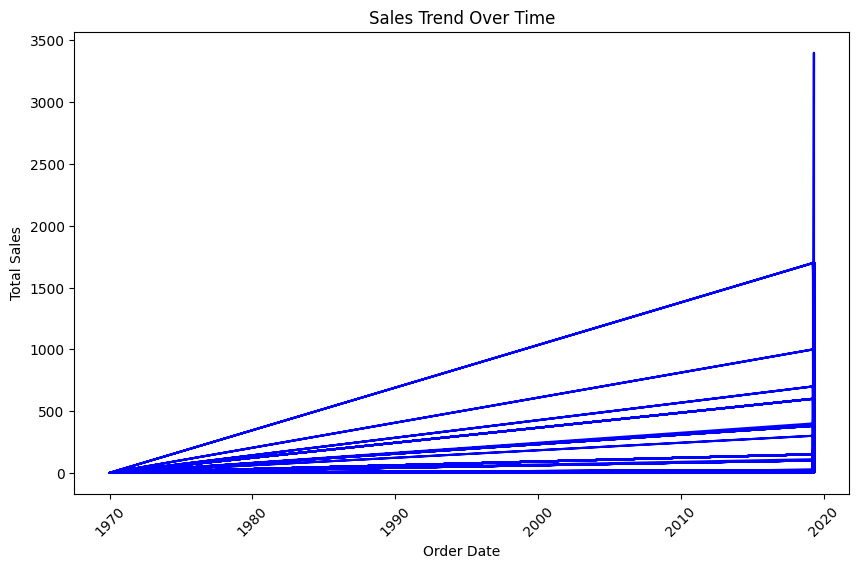

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Price Each' represents the sales amount for each item
# Calculate total sales for each row, skipping rows with errors
df['Total Sales'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce') * pd.to_numeric(df['Price Each'], errors='coerce')

# Drop rows with NaN values in 'Total Sales' to avoid plotting errors
df.dropna(subset=['Total Sales'], inplace=True)

# Plot the total sales trend over time using 'Order Date'
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Total Sales'], color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

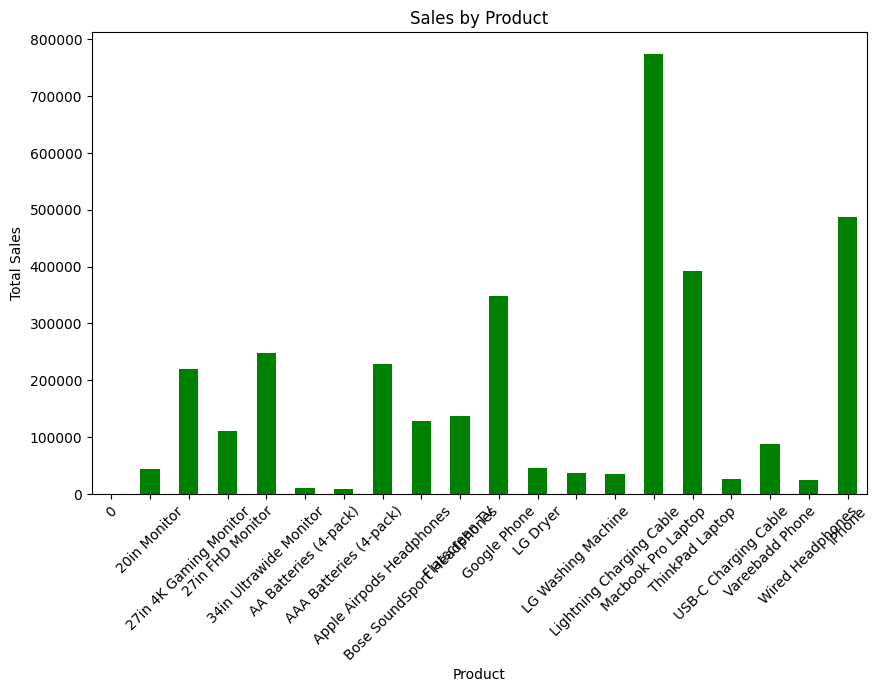

In [ ]:
# Group by product and sum the 'Total Sales' column instead of 'Sales'
product_sales = df.groupby('Product')['Total Sales'].sum()

# Plot sales by product
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color='green')
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

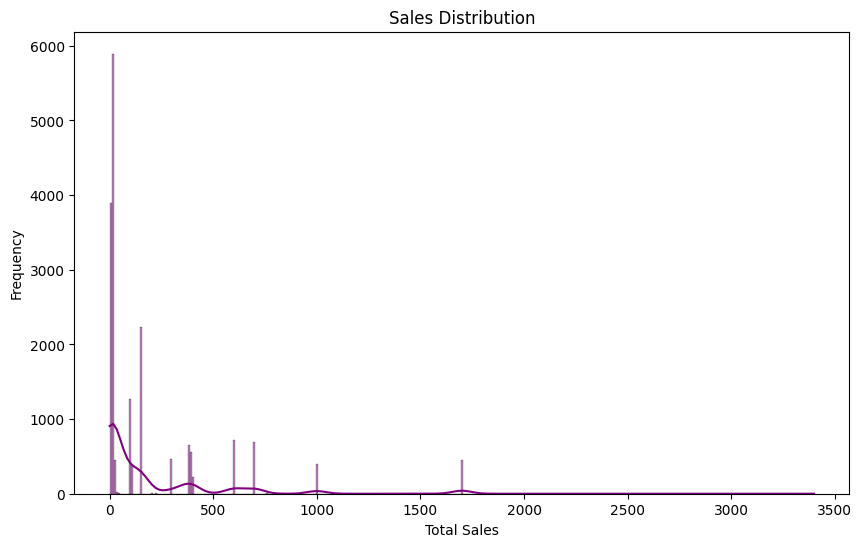

In [ ]:
import seaborn as sns

# Plot the sales distribution using 'Total Sales' instead of 'Sales'
plt.figure(figsize=(10,6))
sns.histplot(df['Total Sales'], kde=True, color='purple')  # Changed 'Sales' to 'Total Sales'
plt.title('Sales Distribution')
plt.xlabel('Total Sales')  # Changed 'Sales' to 'Total Sales'
plt.ylabel('Frequency')
plt.show()